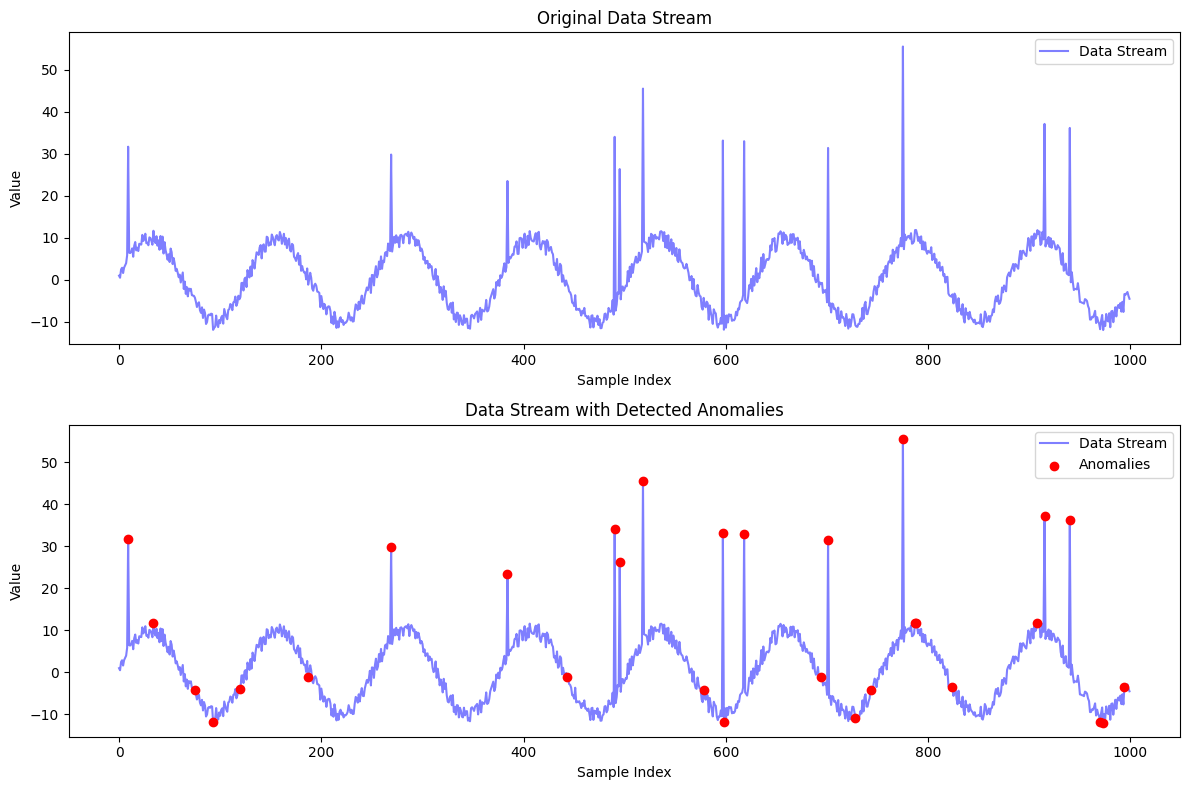

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

def generate_synthetic_data_stream(n_samples=1000):
    t = 0
    data = []
    while len(data) < n_samples:
        seasonal_pattern = 10 * np.sin(t / 20)
        noise = random.uniform(-2, 2)  # Random noise
        value = seasonal_pattern + noise
        if random.random() > 0.99:
            value += random.uniform(20, 50)  # Anomalous value
        data.append(value)
        t += 1
    return np.array(data).reshape(-1, 1)

def calculate_lrd(data, k):
    distances = pairwise_distances(data)
    n_samples = data.shape[0]
    lrd = np.zeros(n_samples)

    for i in range(n_samples):
        # Get the indices of the k-nearest neighbors (excluding the point itself)
        k_nearest_indices = np.argsort(distances[i])[1:k + 1]

        # Calculate reachability distance
        reach_distances = np.maximum(distances[i, k_nearest_indices], distances[k_nearest_indices, i])

        # Calculate local reachability density (LRD)
        lrd[i] = k / np.sum(reach_distances)

    return lrd

def calculate_lof(data, k):
    lrd = calculate_lrd(data, k)
    lof = np.zeros(data.shape[0])

    for i in range(data.shape[0]):
        k_nearest_indices = np.argsort(pairwise_distances(data)[i])[1:k + 1]
        lof[i] = np.sum(lrd[k_nearest_indices] / lrd[i]) / k

    return lof

# Generate synthetic data stream
data_stream = generate_synthetic_data_stream()

# Set parameters
k = 25  # Number of neighbors
threshold = 1.5  # LOF score threshold for anomaly detection

# Calculate LOF scores
lof_scores = calculate_lof(data_stream, k)

# Identify anomalies based on the threshold
anomaly_indices = np.where(lof_scores > threshold)[0]
anomalies = data_stream[anomaly_indices]

# Create the plots
plt.figure(figsize=(12, 8))

# Plot 1: Original Data Stream
plt.subplot(2, 1, 1)
plt.plot(data_stream, label='Data Stream', color='blue', alpha=0.5)
plt.title('Original Data Stream')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Plot 2: Data Stream with Anomalies
plt.subplot(2, 1, 2)
plt.plot(data_stream, label='Data Stream', color='blue', alpha=0.5)
plt.scatter(anomaly_indices, anomalies, color='red', label='Anomalies', zorder=5)
plt.title('Data Stream with Detected Anomalies')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()
